In [71]:
# Import
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score


In [72]:
# Read csv into Dataframe
df = pd.read_csv("kidney_dataset.csv")
df.head()
#df.sample(5)

,Creatinine,BUN,GFR,Urine_Output,Diabetes,Hypertension,Age,Protein_in_Urine,Water_Intake,Medication,CKD_Status
0,0.788803,8.386869,102.161787,1632.649387,0,0,27.682074,106.700203,1.570370,NaN,0
1,3.413970,53.688796,50.071257,935.540516,1,0,33.122208,410.008362,3.425287,ACE Inhibitor,1
2,0.647645,7.466540,89.451831,1774.553846,1,1,55.832284,123.336925,1.123301,Diuretic,0
3,0.795508,12.516821,99.872180,2360.602980,0,0,32.391900,116.098870,3.086846,ACE Inhibitor,0
4,0.869010,19.855960,86.110182,1987.750901,0,1,66.689515,55.668760,2.174980,ARB,0


In [73]:
# Dataframe shape
df.shape

(5000, 11)

In [74]:
# Dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Creatinine        5000 non-null   float64
 1   BUN               5000 non-null   float64
 2   GFR               5000 non-null   float64
 3   Urine_Output      5000 non-null   float64
 4   Diabetes          5000 non-null   int64  
 5   Hypertension      5000 non-null   int64  
 6   Age               5000 non-null   float64
 7   Protein_in_Urine  5000 non-null   float64
 8   Water_Intake      5000 non-null   float64
 9   Medication        2013 non-null   object 
 10  CKD_Status        5000 non-null   int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 429.8+ KB


In [75]:
# Dataframe descriptive statistics
df.describe(include="all")

,Creatinine,BUN,GFR,Urine_Output,Diabetes,Hypertension,Age,Protein_in_Urine,Water_Intake,Medication,CKD_Status
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2013,5000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ACE Inhibitor,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1013,NaN
mean,1.994088,30.780063,73.251883,1664.302800,0.294000,0.378200,50.048733,537.053851,2.504335,NaN,0.263000
std,2.027013,31.148341,31.972399,599.384655,0.455637,0.484986,14.492020,817.510451,0.868925,NaN,0.440306
min,0.600040,7.007732,5.000000,400.502554,0.000000,0.000000,18.000000,50.010471,1.000810,NaN,0.000000
25%,0.801333,11.367599,53.036801,1105.890821,0.000000,0.000000,40.190016,83.692533,1.744138,NaN,0.000000
50%,1.007629,15.878566,89.555882,1814.499690,0.000000,0.000000,49.942824,119.492591,2.511710,NaN,0.000000
75%,2.163997,40.636666,93.989273,2146.441778,1.000000,1.000000,59.761132,588.428649,3.268812,NaN,1.000000


### Comment about the data on describe
* We can see that the "Medication" column is the only one not reaching the '5000' count, to dig in.
* We will detail later the trends and correlation with the graphs.

In [76]:
# Search for null values
print(df.isnull().any())
total_null = df["Medication"].isnull().sum()
total_not_null = df["Medication"].notnull().sum()
ratio_null_medication = total_null / (total_null + total_not_null)
print("Medication has {:.0000%} of 'NaN' values".format(ratio_null_medication))

Creatinine          False
BUN                 False
GFR                 False
Urine_Output        False
Diabetes            False
Hypertension        False
Age                 False
Protein_in_Urine    False
Water_Intake        False
Medication           True
CKD_Status          False
dtype: bool
Medication has 60% of 'NaN' values


In [77]:
# Dig to find what the null values are
print("Dig to find what the null values are...")
print(df["Medication"].unique())
print(df.isnull().any())

# Create mask to get only the index for the null values
print("Create mask to get only the index for the null values...")
mask = df["Medication"].isnull()
index_null = df[mask]["Medication"].index

# Create a dataframe source copy to apply the changes 
df_copy = df.copy()

# Set the "None" value as text instead of the null values
print("Set the 'None' value as text instead of the null values...")
df_copy.loc[index_null, "Medication"] = "None"
print("...Done.")
print()

# Validate that there are no more "null" values
print(df_copy["Medication"].unique())
print(df_copy.isnull().any())
df_copy.head()

Dig to find what the null values are...
[nan 'ACE Inhibitor' 'Diuretic' 'ARB']
Creatinine          False
BUN                 False
GFR                 False
Urine_Output        False
Diabetes            False
Hypertension        False
Age                 False
Protein_in_Urine    False
Water_Intake        False
Medication           True
CKD_Status          False
dtype: bool
Create mask to get only the index for the null values...
Set the 'None' value as text instead of the null values...
...Done.

['None' 'ACE Inhibitor' 'Diuretic' 'ARB']
Creatinine          False
BUN                 False
GFR                 False
Urine_Output        False
Diabetes            False
Hypertension        False
Age                 False
Protein_in_Urine    False
Water_Intake        False
Medication          False
CKD_Status          False
dtype: bool


,Creatinine,BUN,GFR,Urine_Output,Diabetes,Hypertension,Age,Protein_in_Urine,Water_Intake,Medication,CKD_Status
0,0.788803,8.386869,102.161787,1632.649387,0,0,27.682074,106.700203,1.570370,None,0
1,3.413970,53.688796,50.071257,935.540516,1,0,33.122208,410.008362,3.425287,ACE Inhibitor,1
2,0.647645,7.466540,89.451831,1774.553846,1,1,55.832284,123.336925,1.123301,Diuretic,0
3,0.795508,12.516821,99.872180,2360.602980,0,0,32.391900,116.098870,3.086846,ACE Inhibitor,0
4,0.869010,19.855960,86.110182,1987.750901,0,1,66.689515,55.668760,2.174980,ARB,0


In [78]:
# Set "Age" as int64
df_copy["Age"] = df_copy["Age"].astype('int64')
df_copy.head()

,Creatinine,BUN,GFR,Urine_Output,Diabetes,Hypertension,Age,Protein_in_Urine,Water_Intake,Medication,CKD_Status
0,0.788803,8.386869,102.161787,1632.649387,0,0,27,106.700203,1.570370,None,0
1,3.413970,53.688796,50.071257,935.540516,1,0,33,410.008362,3.425287,ACE Inhibitor,1
2,0.647645,7.466540,89.451831,1774.553846,1,1,55,123.336925,1.123301,Diuretic,0
3,0.795508,12.516821,99.872180,2360.602980,0,0,32,116.098870,3.086846,ACE Inhibitor,0
4,0.869010,19.855960,86.110182,1987.750901,0,1,66,55.668760,2.174980,ARB,0


In [79]:
# uACR calculation to see the ratio protein on creatinine
df_copy['uACR'] = df_copy['Protein_in_Urine'] / (df_copy['Creatinine'] / 1000)

['Creatinine', 'BUN', 'GFR', 'Urine_Output', 'Age', 'Protein_in_Urine', 'Water_Intake', 'uACR']


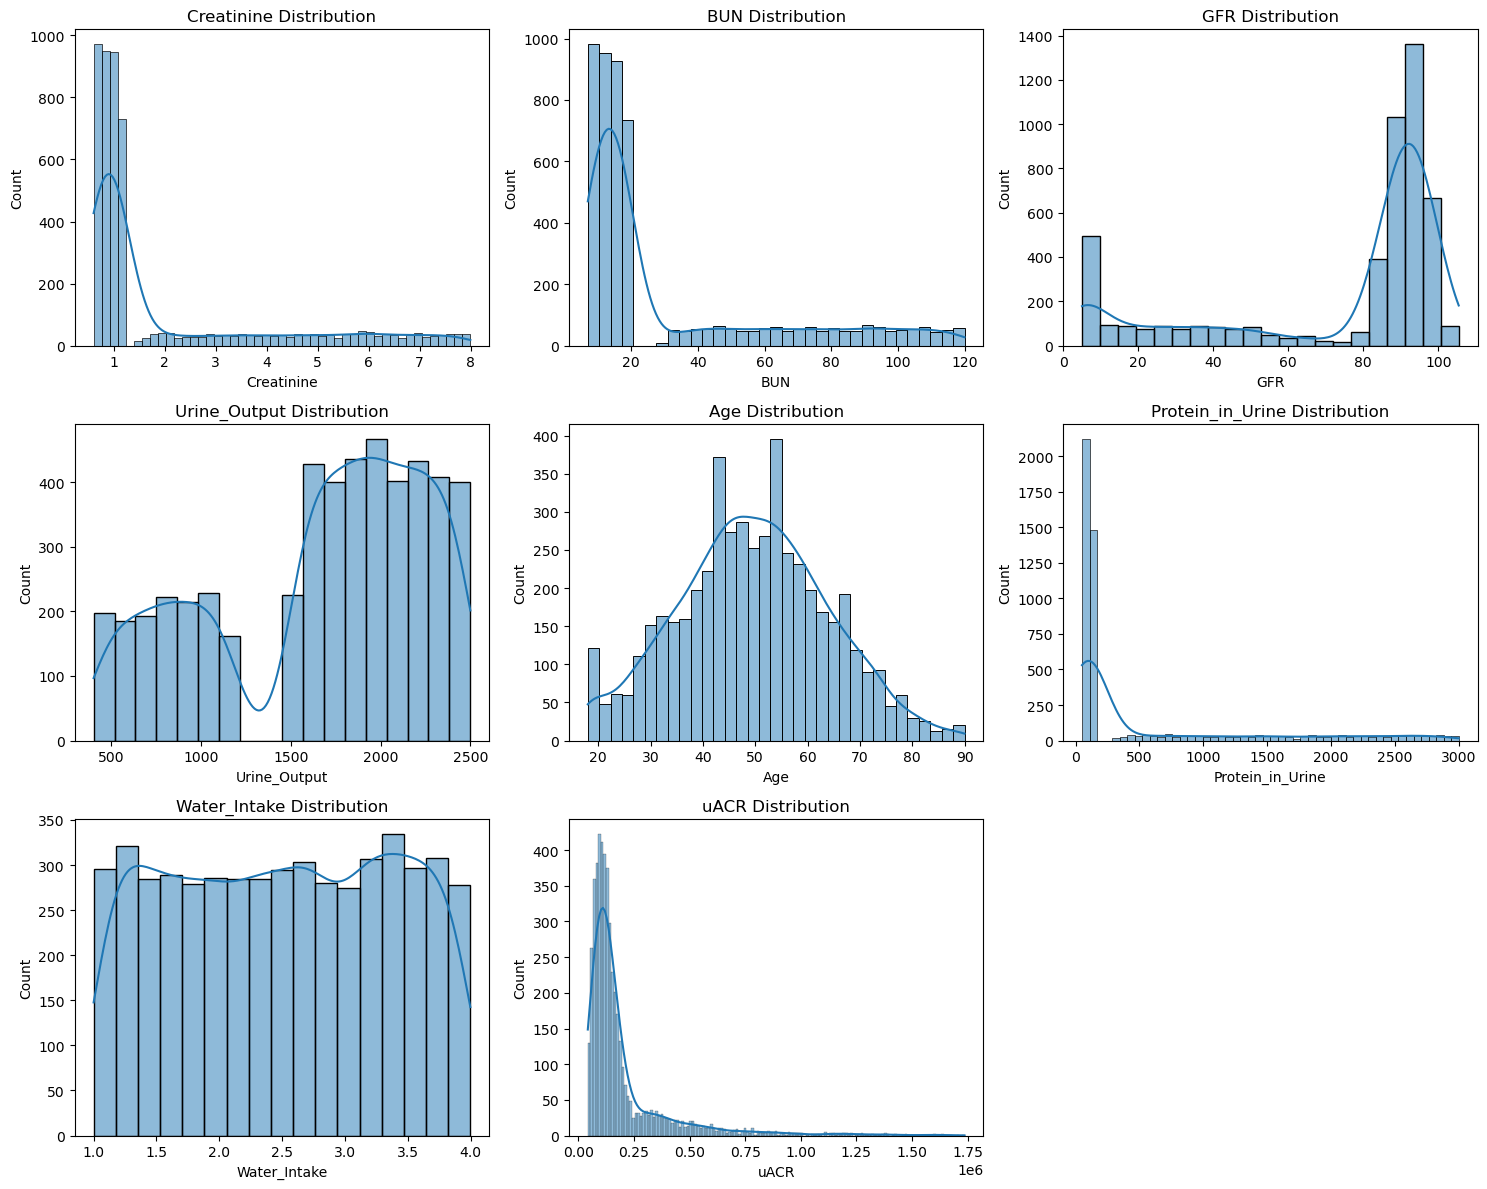

In [80]:
# Visualization 
## Numerical Distribution
numerical_columns = ["Creatinine", "BUN", "GFR", "Urine_Output", "Age", "Protein_in_Urine", "Water_Intake", "uACR"]
print(numerical_columns)
plt.figure(figsize=(15,12))
for i, column in enumerate(numerical_columns):
    plt.subplot(3,3,i+1)
    sns.histplot(df_copy[column], kde=True)
    plt.title(f"{column} Distribution")
plt.tight_layout()
plt.show()


### Comments about histograms on Numerical Distribution
* "GFR" (target): Bimodal (2 peaks) distribution : The Healthy and Non-Healthy
* "Creatinine", "BUN", "Protein_in_Urine", "uACR": Skewed right distribution (log-normal) with most of the patient with low values
* "Age", "Water_Intake", "Urine_Output": Normal distribution 

['Creatinine', 'BUN', 'Urine_Output', 'Age', 'Protein_in_Urine', 'Water_Intake', 'uACR']


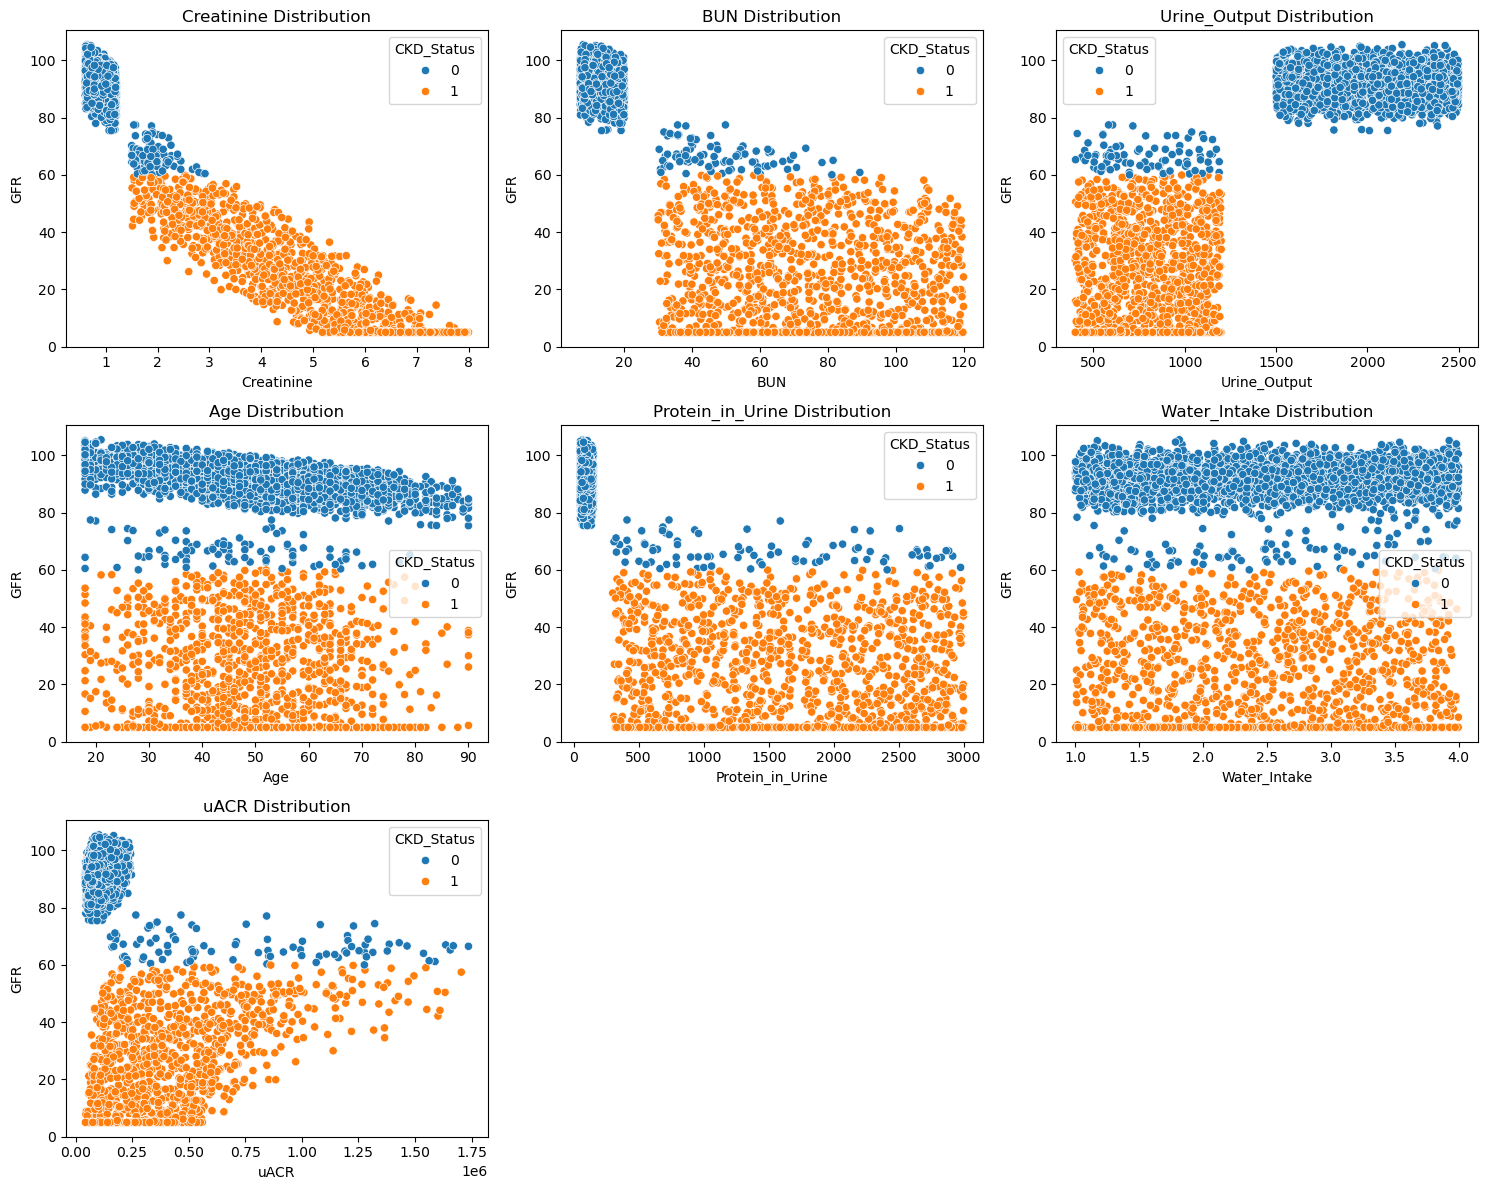

In [81]:
# Correlation Visualization
## Numerical Distribution
numerical_columns = ["Creatinine", "BUN", "Urine_Output", "Age", "Protein_in_Urine", "Water_Intake", "uACR"]
print(numerical_columns)
plt.figure(figsize=(15,12))
for i, column in enumerate(numerical_columns):
    plt.subplot(3,3,i+1)
    sns.scatterplot(x=column, y="GFR", data=df_copy, hue="CKD_Status")
    plt.title(f"{column} Distribution")
plt.tight_layout()
plt.show()



### Comments about scatterplots on Numerical Distribution
* "Creatinine" vs "GFR": The relation is clear, the correlation is really strong. High creatinine and low GFR = Kidney Disease ; Low creatinine and high GFR = Kidney Healthy
* "BUN" vs "GFR": Still a strong correlation,but a bit more dispatched than the creatinine relation
* "Protein_in_Urine" and "uACR" vs "GFR": The relation becomes less evident due to the disparity, but we can still a pattern with low Protein_in_Urine and GFR
* "Others" vs "GFR": Not clear relation between them

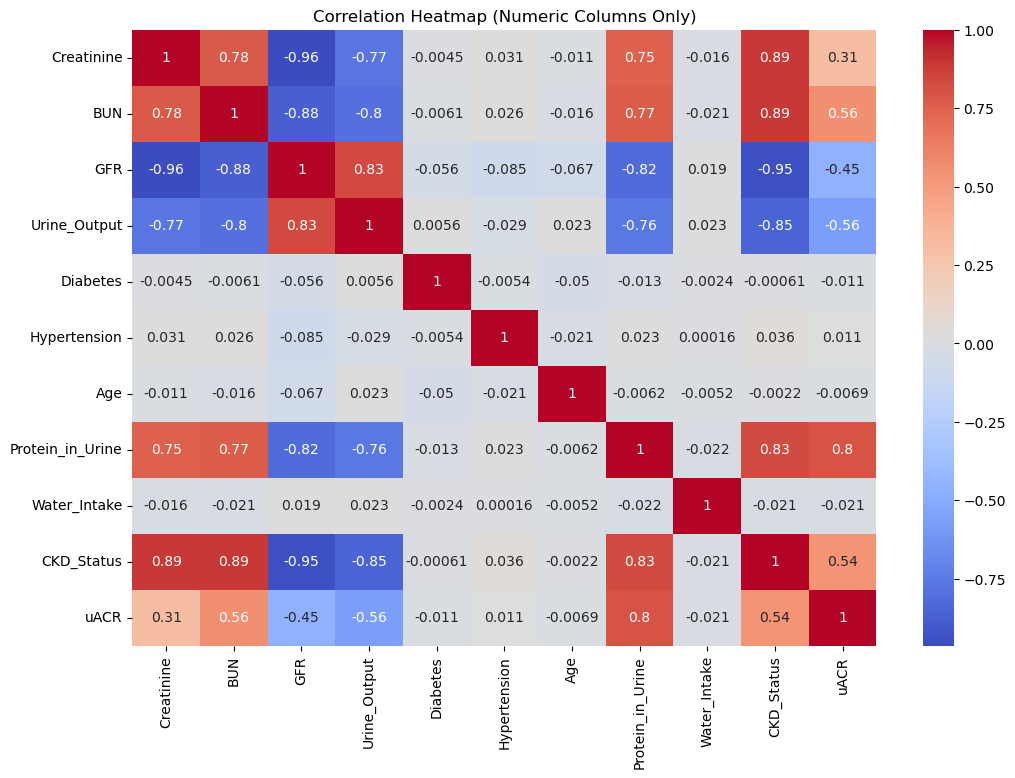

In [82]:
numeric_df = df_copy.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()

### Comments about Correlation Heatmap
* "Creatinine", "BUN", "Protein_in_Urine", "CKD_Status" have a strong negative correlation with "GFR". This implies that their directions will follow the "GFR" opposite trend. 
* "Urine_Output" has a strong positive correlation with "GFR". This implies that their directions will follow the "GFR" trend. 

['Diabetes', 'Hypertension', 'Medication', 'CKD_Status']


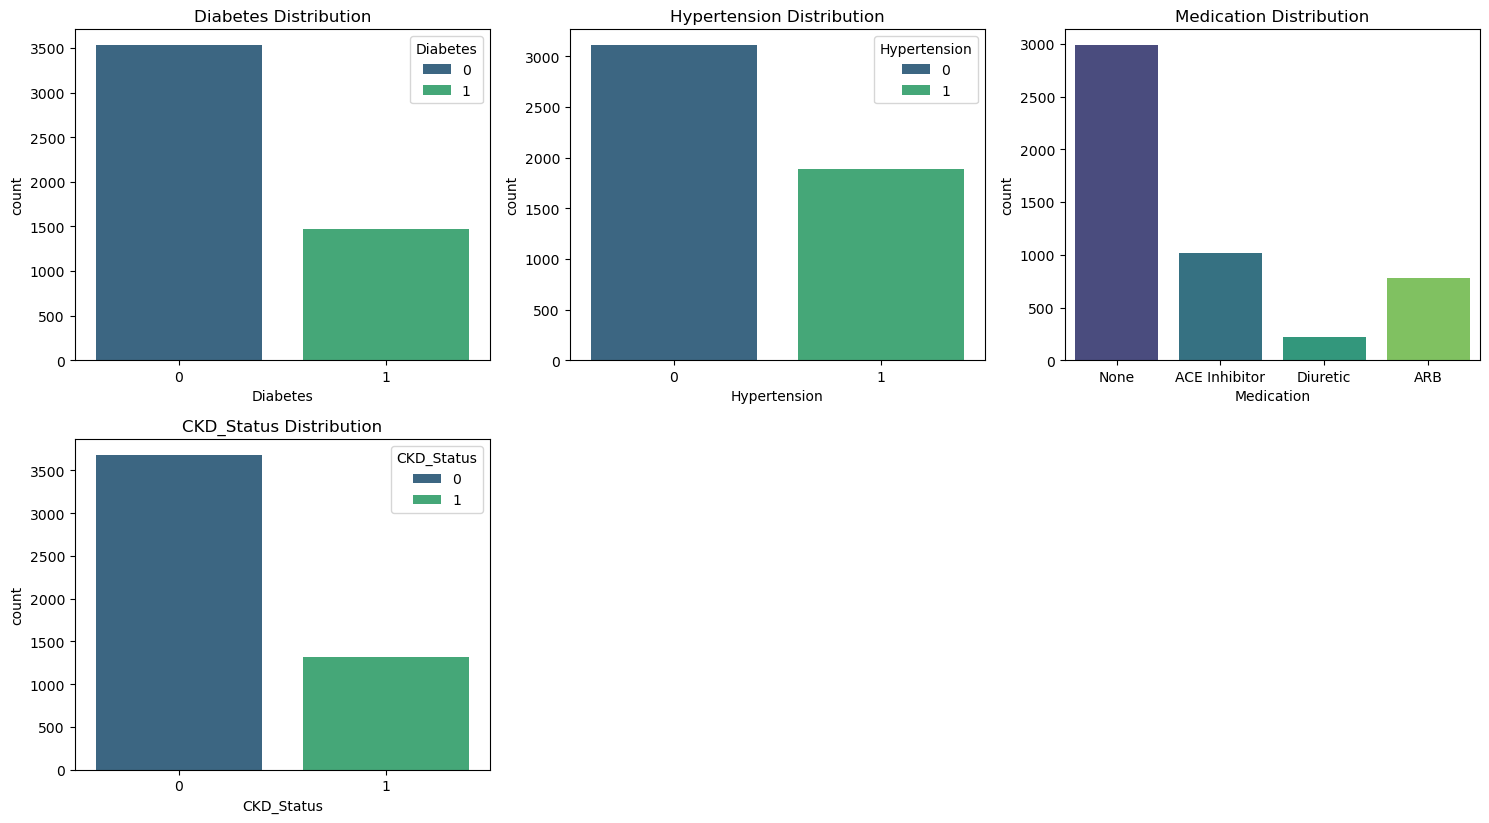

In [83]:
# Visualization
## Categorical Variable
categorical_columns = ["Diabetes", "Hypertension", "Medication", "CKD_Status"]
print(categorical_columns)
plt.figure(figsize=(15,12))
for i, column in enumerate(categorical_columns):
    plt.subplot(3,3,i+1)
    sns.countplot(x=column, data=df_copy, palette='viridis', hue=column)
    plt.title(f"{column} Distribution")
plt.tight_layout()
plt.show()

### Comments about the histograms on Categorical Distribution
* "Diabetes", "Hypertension", "CKD_Status": Bernoulli Distribution based on the count of 0 and 1. We deduce that the 0 (representing the "healthy" metric) are always much bigger than the 1 (representing the "disease" metrics and more rare)
* "Medication": Multinoulli distribution based on 4 categories. We deduce that the "Medication" None is more common than the 3 others.

['Creatinine', 'BUN', 'Urine_Output', 'Age', 'Protein_in_Urine', 'Water_Intake', 'uACR']


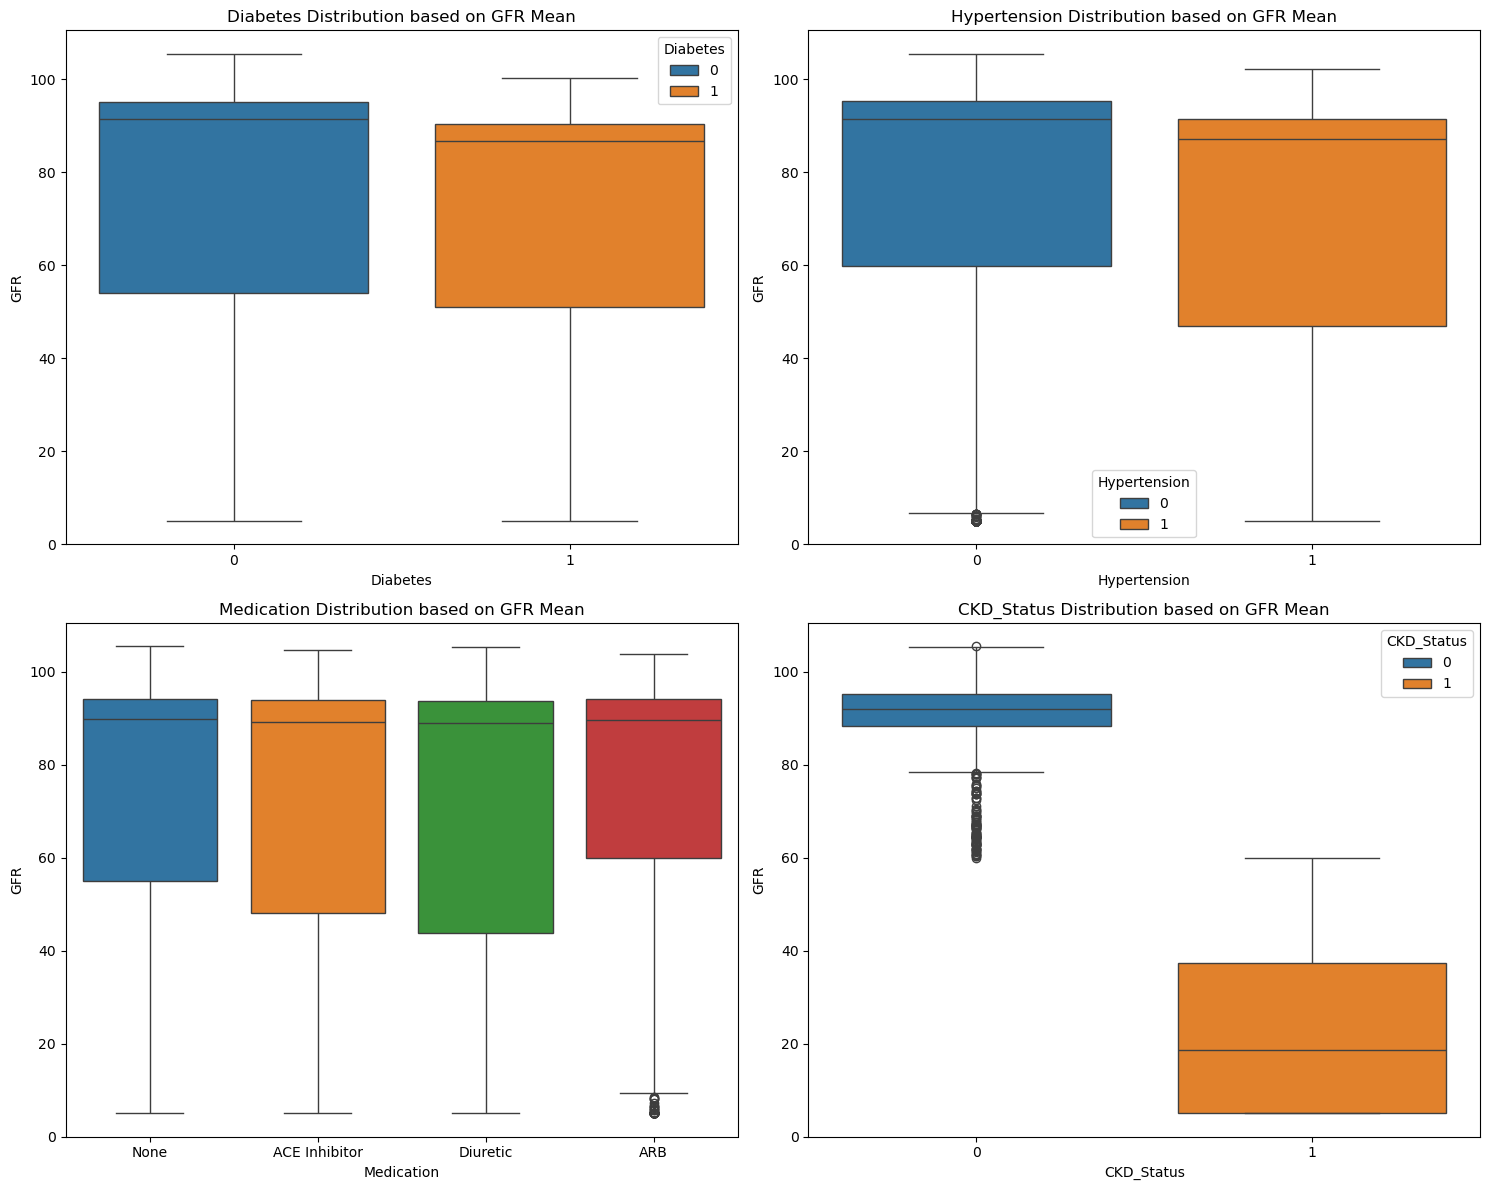

In [84]:
# Correlation Visualization
## Categorical Variable
categorical_columns = ["Diabetes", "Hypertension", "Medication", "CKD_Status"]
print(numerical_columns)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()
for i, column in enumerate(categorical_columns):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=column, y="GFR", data=df_copy, ax=axes[i], hue=column)
    plt.title(f"{column} Distribution based on GFR Mean")
plt.tight_layout()
plt.show()

### Comments about boxplots on Categorical Distribution
* The boxplots show the GFR's mean for each categorical distribution. We observe that the mean GFR is significantly lower for patients with `CKD_Status = 1`, which confirms that our sample contains a majority of 'Kidney Healthy' patients.
* This strong relationship is expected, as the CKD status is directly defined by the GFR level.
* The differences in mean GFR for `Diabetes` and `Hypertension` are also visible, but far less pronounced

In [ ]:
# Remove 'CKD_status' and 'uACR' to avoid data leak
df_copy = df_copy.drop(axis=1, columns=["CKD_Status", "uACR"])

In [86]:
# Separate target variable Y from features X
print("Separating target variable from features...")

## Choose the columns you want to have as your features
X = df_copy.loc[:, df_copy.columns != 'GFR'] # We add feature_list into our loc 
y = df_copy.loc[:,"GFR"] # We set "GFR" as the target variable

print("...Done.")
print()

Separating target variable from features...
...Done.



In [87]:
# Divide dataset Train set & Test set 
print("Splitting dataset into train set and test set...")
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

print("...Done.")   

Splitting dataset into train set and test set...
...Done.


In [88]:
# Encoding categorical features and standardizing numeric features
print("#### X_train BEFORE preprocessing ####")
print(X_train.head())
print()

print("Encoding categorical features and standardizing numerical features...")
## First let's import libraries
## StandardScaler to scale data (i.e apply Z-score)
## OneHotEncoder to encode categorical variables
numeric_index = [X_train.columns.get_loc(col) for col in ["Creatinine", "BUN", "Urine_Output", "Age", "Protein_in_Urine", "Water_Intake"]]
print(numeric_index)
numeric_features = numeric_index
numeric_transformer = StandardScaler()

## OneHotEncoder to encode categorical variables
categorical_index = [X_train.columns.get_loc(col) for col in ["Diabetes", "Hypertension", "Medication"]]
print(categorical_index)
categorical_features = categorical_index
categorical_transformer = OneHotEncoder(drop='first')


# Apply ColumnTransformer to create a pipeline that will apply the above preprocessing
feature_encoder = ColumnTransformer(
    transformers=[
            ('cat', categorical_transformer, categorical_features),    
            ('num', numeric_transformer, numeric_features)
        ]
    )

X_train_transformed = feature_encoder.fit_transform(X_train)
print("...Done.")
print("#### X_train AFTER preprocessing ####")
print(X_train_transformed[0:5,:]) # print first 5 rows (not using iloc since now X_train became a numpy array)
print()


#### X_train BEFORE preprocessing ####
      Creatinine        BUN  Urine_Output  Diabetes  Hypertension  Age  \
2913    0.760254   7.356197   1812.804211         1             0   53   
3275    1.109978  11.630360   2412.353771         1             1   57   
775     0.873221  18.660456   1995.156153         0             0   63   
217     0.777776   7.763942   2415.789149         1             1   55   
1245    1.048714   8.213479   2301.227301         0             1   24   

      Protein_in_Urine  Water_Intake     Medication  
2913         61.701687      3.277343           None  
3275        116.535315      2.350423           None  
775          96.584766      1.186416  ACE Inhibitor  
217          71.611612      2.253034           None  
1245         50.416219      3.586090  ACE Inhibitor  

Encoding categorical features and standardizing numerical features...
[0, 1, 2, 5, 6, 7]
[3, 4, 8]
...Done.
#### X_train AFTER preprocessing ####
[[ 1.          0.          0.          0.    

In [89]:
# Standardizing numeric features
print("Standardizing numerical features...")
print(X_test)
print()

X_test_transformed = feature_encoder.transform(X_test)

print("...Done.")
print(X_test_transformed[:5]) # print first 5 rows (not using iloc since now X_test became a numpy array)
print()

Standardizing numerical features...
      Creatinine        BUN  Urine_Output  Diabetes  Hypertension  Age  \
398     0.700549   8.291042   2353.675633         1             0   47   
3833    0.858684  13.847081   2441.671189         0             0   47   
4836    5.620294  50.508751   1104.643780         0             1   38   
4572    1.092196  10.024021   1845.520729         0             0   54   
636     0.904934  16.775138   2448.531492         0             0   59   
...          ...        ...           ...       ...           ...  ...   
4228    0.948499  10.244916   2398.277275         0             0   67   
2367    0.774869  17.757922   2057.807088         0             0   48   
788     0.925907  16.532034   2309.043389         0             1   80   
1452    1.080978   7.157205   1800.459633         1             0   34   
3265    0.967769  10.148054   1762.693455         0             0   52   

      Protein_in_Urine  Water_Intake     Medication  
398         133.76290

In [90]:
# Function to check if in the pred there are GFR lower than 5 or higher than 120 (limitation)
def check_over_extend_y_limitation(model_name, y_pred):
    res_pred = np.any((y_pred > 120) | (y_pred < 5))
    mask_higher_120 = y_pred > 120
    mask_lower_5 = y_pred < 5
    print(f"Are there any prediction > 120 or < 5 with the model {model_name} ?  Answer : {res_pred}")
    if res_pred == True:
        if np.any(y_pred > 120):
            print("There are prediction above 120")
            print("Example of prediction below 5",y_pred[mask_higher_120][:5])
            print("Total of prediction below 5: ",len(y_pred[mask_higher_120]))
        elif np.any(y_pred < 5):
            print("There are prediction below 5")
            print("Example of prediction below 5",y_pred[mask_lower_5][:5])
            print("Total of prediction below 5: ",len(y_pred[mask_lower_5]))
        elif np.any((y_pred > 120) and (y_pred < 5)):
            print("There are prediction above 120 and below 5")
            print("Example of prediction below 5",y_pred[mask_higher_120][:5])
            print("Total of prediction below 5: ",len(y_pred[mask_higher_120]))
            print("Example of prediction below 5",y_pred[mask_lower_5][:5])
            print("Total of prediction below 5: ",len(y_pred[mask_lower_5]))


In [91]:
def prediction_and_regression_metrics(model, name, X, y, duration):
    y_pred = model.predict(X)

    check_over_extend_y_limitation(name, y_pred)
    
    return {
        "Model": name,
        "Mean Absolute Error (MAE)": round(mean_absolute_error(y, y_pred), 4),
        "Mean Squared Error (MSE)": round(mean_squared_error(y, y_pred), 4),
        "Root Mean Squared Error (RMSE)": round(root_mean_squared_error(y, y_pred), 4),
        "R-squared (R²) or Coefficient of Determination": round(r2_score(y, y_pred), 4),
        "Time (s)": round(duration, 3)
    }

In [92]:
models = {
    "Linear Regression":  LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(ccp_alpha=0.001, max_depth=None, min_samples_split=5 , min_samples_leaf=2, random_state=0),
    "Random Forest Regressor" : RandomForestRegressor(n_estimators=100, max_features="sqrt", max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=0)
}

results_train = []
results_test = []
models_test = []
for name, model in models.items():
    start = time.time()
    model.fit(X_train_transformed, y_train)
    models_test.append({
        "Model": model,
        "Name": name,
    })
    duration = time.time() - start
    print(f"--- {name} Training ---")
    results_train.append(prediction_and_regression_metrics(model, name, X_train_transformed, y_train, duration))
    print(f"--- {name} Test ---")
    results_test.append(prediction_and_regression_metrics(model, name, X_test_transformed, y_test, duration))

print("--- Training Result ---")
df_results_train = pd.DataFrame(results_train)
print(df_results_train)

print("--- Test Result ---")
df_results_test = pd.DataFrame(results_test)
print(df_results_test)

df_models_test = pd.DataFrame(models_test)


--- Linear Regression Training ---
Are there any prediction > 120 or < 5 with the model Linear Regression ?  Answer : True
There are prediction below 5
Example of prediction below 5 [  3.00583298   1.93742583   4.45659165  -2.07137769 -18.30187234]
Total of prediction below 5:  203
--- Linear Regression Test ---
Are there any prediction > 120 or < 5 with the model Linear Regression ?  Answer : True
There are prediction below 5
Example of prediction below 5 [  4.09940884  -4.10429704  -2.92704361  -9.49932026 -10.94802433]
Total of prediction below 5:  41
--- Decision Tree Regressor Training ---
Are there any prediction > 120 or < 5 with the model Decision Tree Regressor ?  Answer : False
--- Decision Tree Regressor Test ---
Are there any prediction > 120 or < 5 with the model Decision Tree Regressor ?  Answer : False
--- Random Forest Regressor Training ---
Are there any prediction > 120 or < 5 with the model Random Forest Regressor ?  Answer : False
--- Random Forest Regressor Test --

All features names after encoding :
['cat__Diabetes_1' 'cat__Hypertension_1' 'cat__Medication_ARB'
 'cat__Medication_Diuretic' 'cat__Medication_None' 'num__Creatinine'
 'num__BUN' 'num__Urine_Output' 'num__Age' 'num__Protein_in_Urine'
 'num__Water_Intake']

Linear Regression
Coefficients are:  [-4.66275694e+00 -3.74874801e+00 -5.36447221e-02 -1.46831152e-01
  1.48124506e-02 -2.07756362e+01 -8.46945140e+00  1.67959132e+00
 -2.68323770e+00 -3.03800836e+00 -3.66778266e-02]
Constant is:  75.78897918121717
Model's Coefficients per feature:
                     Feature  Coefficient
7          num__Urine_Output     1.679591
4       cat__Medication_None     0.014812
10         num__Water_Intake    -0.036678
2        cat__Medication_ARB    -0.053645
3   cat__Medication_Diuretic    -0.146831
8                   num__Age    -2.683238
9      num__Protein_in_Urine    -3.038008
1        cat__Hypertension_1    -3.748748
0            cat__Diabetes_1    -4.662757
6                   num__BUN    -8.4694

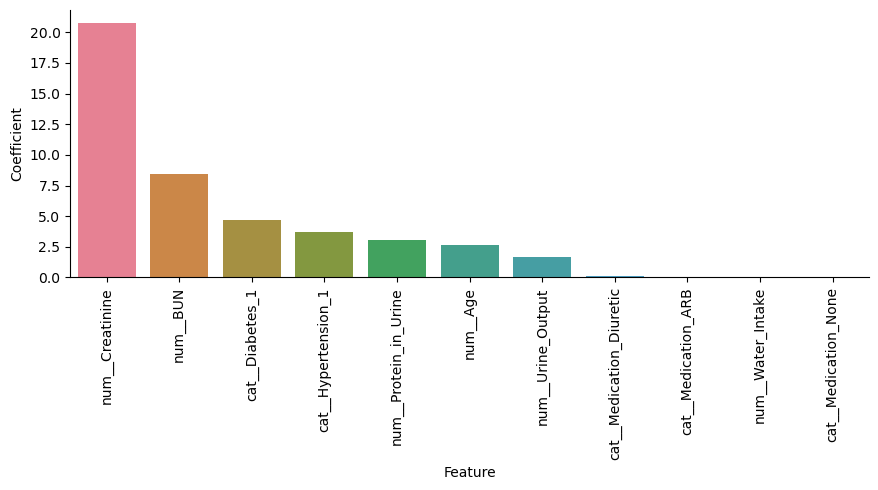

Decision Tree Regressor
Features importance Decision Tree Regressor:
                     Feature  Importance
5            num__Creatinine    0.974500
6                   num__BUN    0.010456
8                   num__Age    0.006672
0            cat__Diabetes_1    0.003973
1        cat__Hypertension_1    0.002898
9      num__Protein_in_Urine    0.001211
7          num__Urine_Output    0.000139
10         num__Water_Intake    0.000113
2        cat__Medication_ARB    0.000020
4       cat__Medication_None    0.000019
3   cat__Medication_Diuretic    0.000000


C:\Users\Admin\AppData\Local\Temp\ipykernel_53364\1134979802.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance',


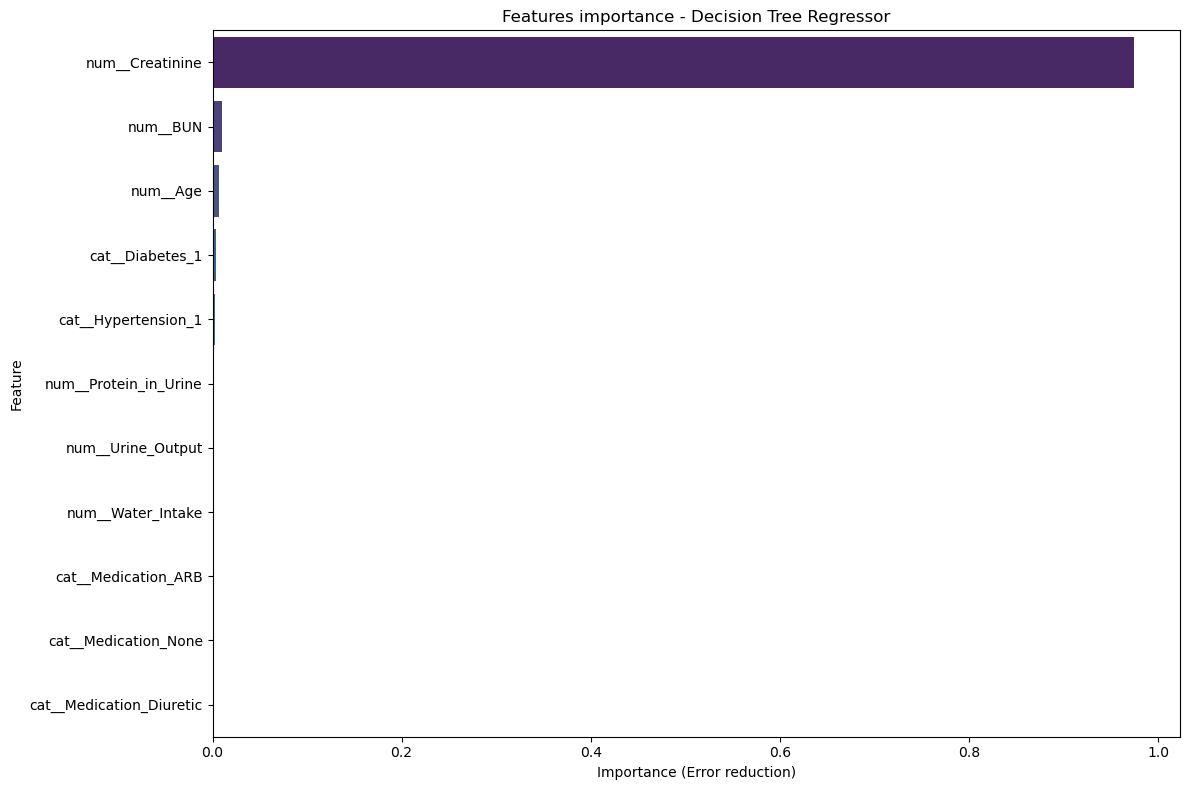

Random Forest Regressor
Features importance Random Forest Regressor:
                     Feature  Importance
5            num__Creatinine    0.353673
6                   num__BUN    0.262148
9      num__Protein_in_Urine    0.224600
7          num__Urine_Output    0.138366
8                   num__Age    0.008970
0            cat__Diabetes_1    0.003918
10         num__Water_Intake    0.003818
1        cat__Hypertension_1    0.003426
4       cat__Medication_None    0.000519
2        cat__Medication_ARB    0.000376
3   cat__Medication_Diuretic    0.000186


C:\Users\Admin\AppData\Local\Temp\ipykernel_53364\1134979802.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance',


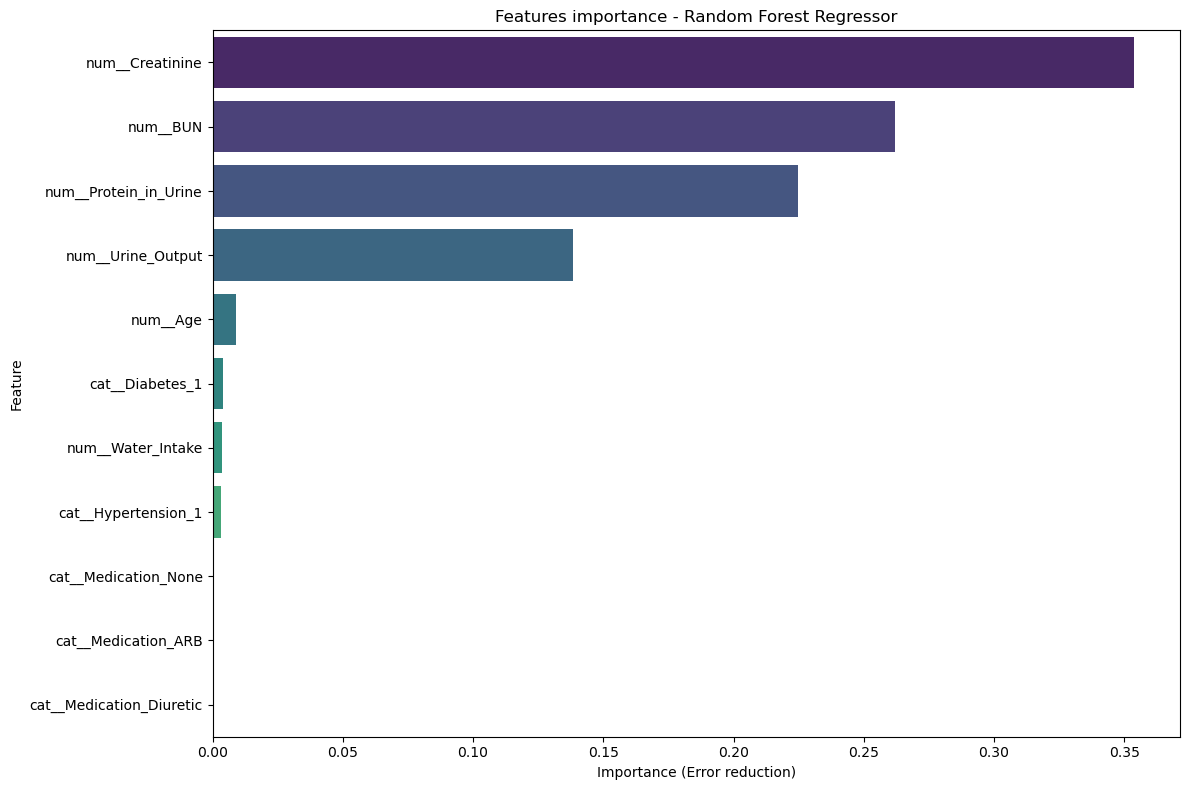

In [93]:
# Visualization Coef / Features importance based on GFR
all_column_names = feature_encoder.get_feature_names_out()
print("All features names after encoding :")
print(all_column_names)
print()

for _, row in df_models_test.iterrows():
    print(row["Name"])
    if row["Name"] == "Linear Regression":
        print("Coefficients are: ", row["Model"].coef_)
        print("Constant is: ", row["Model"].intercept_)
        # Set DataFrame with all column names & coef associated
        coefficients_df = pd.DataFrame({
            'Feature': all_column_names,
            'Coefficient': row["Model"].coef_
        })
        print("Model's Coefficients per feature:")
        print(coefficients_df.sort_values(by='Coefficient', ascending=False))
        # Set coefficient to absolute values to rank features
        coefficients_df["Coefficient"] = coefficients_df["Coefficient"].abs()

        # Visualize ranked features using seaborn
        sns.catplot(x="Feature",
                    y="Coefficient",
                    data=coefficients_df.sort_values(by="Coefficient", ascending=False),
                    kind="bar",
                    aspect=16/9, # Resize graph
                    hue="Feature",
        )
        plt.xticks(rotation=90)
        plt.tight_layout() # Adjust visibility
        plt.show()
    else:
        # Importance features from tree / forest
        importances = row["Model"].feature_importances_
        # Set DataFrame with all column names & features importance associated
        feature_importance_df = pd.DataFrame({
            'Feature': all_column_names,
            'Importance': importances
        })
        # Sort by features importance
        feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
        print(f"Features importance {row["Name"]}:")
        print(feature_importance_df)
        # Visualize ranked features using matplot
        plt.figure(figsize=(12, 8)) # 
        sns.barplot(x='Importance',
                    y='Feature',
                    data=feature_importance_df,
                    orient='h', 
                    palette='viridis')
        plt.title(f'Features importance - {row["Name"]}')
        plt.xlabel('Importance (Error reduction)')
        plt.ylabel('Feature')
        plt.tight_layout() # Adjust visibility
        plt.show()

    


### Graph 1: Linear Regression Coefficients

*   **What it tells us:** This graph shows how much each feature linearly influences the final `GFR` prediction. A large negative bar means an increase in that feature's value causes a large *decrease* in the predicted `GFR`.
*   **The Story:** This model has learned a clear and clinically relevant story. **`num__Creatinine`** has the largest negative coefficient by a wide margin, meaning the model identifies it as the primary factor for predictin a lower `GFR`. **`num__BUN`** is the second most significant factor for predicting a lower `GFR`. Conversely, `num_Urine_Output` has a positive coefficient, correctly indicating that higher urine output is associated with a healthier, higher `GFR`.

### Graph 2: Decision Tree Regressor Feature Importance

*   **What it tells us:** This graph shows which feature the single Decision Tree found most effective for reducin its prediction error when estimating `GFR`.
*   **The Story:** Similar to the classification task, this model exhibits "greedy" behavior. It has determined th **`num__Creatinine`** is the most powerful predictor by an overwhelming majority (over 95% importance). While `Protein_in_Urine` and `BUN` have a minor influence, the model's logic is almost entirely dependent on `Creatinine` This is a very simple but potentially brittle way to predict `GFR`, as it largely ignores other contributing factors.

### Graph 3: Random Forest Regressor Feature Importance

*   **What it tells us:** This graph shows a more stable and balanced view by averaging the feature importances across all 100 trees in the forest.
*   **The Story:** This model provides the most robust and nuanced perspective. While it agrees that `Creatinine` a top predictor, it does not see it as the only important one. It identifies a committee of critical features for predicting `GFR`:
    1.  `num__Creatinine`
    2.  `num__Urine_Output`
    3.  `num__BUN`
    4.  `num__Protein_in_Urine`
    5.  `num__uACR` (your engineered feature)

### Final thoughts
The best model between the Linear Regression, Decision Tree Regressor and Random Forest Regressor is in the order :
1. Random Forest Regressor
2. Decision Tree Regressor
3. Linear Regression

The Random Forest Regressor is the one outstanding the 2 others with better results in general, except for the model speed (**39 times slower than the Linear Regression**).

**Moreover**, a really important point to highlight is that Features importance from the Random Forest Regressor is well matching the correlation seen previously in the EDA phase. Therefore, the Random Forest Regressor is the best model in term accuracy, but also in term of interpretation and robustness, which makes it the best choice for our medical use-case.